# Introduction

Textual data is so rich in semantics and grammatical rules. Vectorizing texts while encoding all this information and knowledge is not straightforward. Up until now, embeddings have been the most convenient way to vectorize texts. <br>
Text embeddings are a dictionary with the keys being the words and the values being the vectors representing these words. In other words, to vectorize a phrase with three words, we fetch each word's vector from the embedding dictionary and either sum/average/concatenate/etc., these vectors.  

## Objective
This notebook aims to guide you through training your embeddings. <br>
While pre-trained embeddings are more available nowadays, they do not always fit the problem we have at hand. <br>
Medical textual data differs from Twitter conversations, google reviews, etc.,. Thus, we need to train our own embeddings to learn the contextual semantics of our dataset.

## Tasks
This notebook contains code you simply need to run and code cells you need to fill in. <br>
No code from your side is required in code blocks where you see the mention *run only*. <br>
When you see the mention *code*, a chunk of code is required from your side. <br>
When you see the mention *comment*, you will need to write a comment/an explication/ an analysis about the subject at hand. 

# 1. Load Wikipedia Corpus (*run only*)

In [21]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.corpora import WikiCorpus
path_to_wiki_dump = datapath("enwiki-latest-pages-articles1.xml-p000000010p000030302-shortened.bz2")
corpus_path = get_tmpfile("wiki-corpus.mm")
wiki = WikiCorpus(path_to_wiki_dump)
sentences = list(wiki.get_texts())

/Users/fulin/anaconda3/lib/python3.11/site-packages/gensim/utils.py:1333: UserWarning: detected OSX with python3.8+; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)


# 2. Word2vec skipgram - dimension of the word vectors = 50
## 2.1 Train word2vec with skipgram(*code*)

In [22]:
from gensim.models import Word2Vec

# Skipgram -> sg=1
model = Word2Vec(sentences, vector_size=50, sg = 1, window=5, min_count=5, workers=4)

## 2.2 Print the first 20 words in the vocabulary (*code*)

In [23]:
vocab_list = list(model.wv.index_to_key)
for word in vocab_list[:20]:
    print(word)

the
of
and
in
to
is
as
for
by
that
with
was
on
are
from
an
or
it
at
be


## 2.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

In [24]:
print(f"Embedding vector for 'education':\n{model.wv['education']}")

Embedding vector for 'education':
[-0.8593838   0.06345756 -0.0070341   0.1950583  -0.38298455 -0.55237055
  0.19761121  0.6517014  -0.35700178  0.11739145 -0.21537279 -0.13946845
  0.19709201 -0.61161125 -0.04666885  0.47313806  0.4112398   0.49433294
 -0.2439893   0.05778026  0.3111383   0.22589615  0.33092773 -0.45059502
  0.23868261  0.746205   -0.62669367  0.45324677 -0.5169701  -0.41892704
 -0.06597804  0.16028018  0.4771643   0.15373488 -0.2238624   0.09089223
  0.25780353 -0.04552143 -0.13171078  0.3209486   0.00414795  0.30556333
 -0.07766452  0.1988469  -0.1912114  -0.1560913  -0.29302296 -0.13514845
  0.17275666  0.06503981]


In [25]:
# Print the embedding vector for "algorithm"
print(f"\nEmbedding vector for 'algorithm':\n{model.wv['algorithm']}")


Embedding vector for 'algorithm':
[ 0.37195876  0.61848044 -0.06616719 -0.55512094 -0.22362968 -0.514176
 -0.08970753  0.34628168 -0.12361864 -0.10067541 -0.14534204  0.05609837
  1.1461221  -0.6010339   0.072157    0.24513097  0.68413883  0.39435202
 -0.33349892 -0.41626993 -0.12979987  0.08829456 -0.04180891 -0.59218806
 -0.39159295 -0.3886251  -0.24018936 -0.24972995  0.14006843 -0.13078909
  0.16283546 -0.32970124 -0.15181531  0.12792444 -0.0826518  -0.31487858
 -0.6987255  -0.26402864 -0.6594094  -0.03113542  0.11921131 -0.20513389
  0.5573807   0.47960433  0.6305448  -0.02747343 -0.56499517 -0.49432096
  0.15250693 -0.21761878]


## 2.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

In [26]:
print("Similarity between 'education' and 'algorithm':")
print(model.wv.similarity('education', 'algorithm'))

print("\nSimilarity between 'education' and 'latin':")
print(model.wv.similarity('education', 'latin'))

print("\nSimilarity between 'education' and 'age':")
print(model.wv.similarity('education', 'age'))

print("\nSimilarity between 'education' and 'death':")
print(model.wv.similarity('education', 'death'))

print("\nSimilarity between 'spanish' and 'latin':")
print(model.wv.similarity('spanish', 'latin'))

Similarity between 'education' and 'algorithm':
0.18431677

Similarity between 'education' and 'latin':
0.23010063

Similarity between 'education' and 'age':
0.4782453

Similarity between 'education' and 'death':
0.30983737

Similarity between 'spanish' and 'latin':
0.62125385


## 2.5 Save the embeddings (*code*)

In [27]:
model.save("word2vec_skipgram_model.model")

# 3. Word2vec cbow - dimension of the word vectors = 50
## 3.1 Train word2vec with cbow(*code*)

In [28]:
# cbow -> sg=0
model_cbow = Word2Vec(sentences, vector_size=50, sg=0, window=5, min_count=5, workers=4)

## 3.2 Print the first 20 words in the vocabulary (*code*)

In [29]:
vocab_list_cbow = list(model_cbow.wv.index_to_key)
for word in vocab_list_cbow[:20]:
    print(word)

the
of
and
in
to
is
as
for
by
that
with
was
on
are
from
an
or
it
at
be


## 3.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

In [30]:
print(f"Embedding vector for 'education':\n{model_cbow.wv['education']}")

Embedding vector for 'education':
[-0.55846936 -0.28324893  0.18126336  0.04075631 -0.20232917 -0.7829376
  0.74689245  0.9898129  -0.26395205  0.14533837 -0.16914766 -0.64642453
  0.0053262   0.354102   -0.10537331  0.20438734  0.60989404  0.24482048
 -0.46076095 -1.0264177   0.07397266  0.02265627  0.10690664 -0.3870248
  0.16126058  0.43254575 -0.72133595  0.12083632 -0.1840094  -0.5450511
 -0.3326719   0.22453758  0.5923819  -0.29644784 -0.5966525   0.24045841
  0.8052232   0.07194377  0.07925682 -0.35249007  0.51066965 -0.43795457
 -0.5914106   0.64400345  0.38723508 -0.13997397 -0.23351635 -0.68725294
  0.10546445  0.78039944]


In [31]:
print(f"Embedding vector for 'algorithm':\n{model_cbow.wv['education']}")

Embedding vector for 'algorithm':
[-0.55846936 -0.28324893  0.18126336  0.04075631 -0.20232917 -0.7829376
  0.74689245  0.9898129  -0.26395205  0.14533837 -0.16914766 -0.64642453
  0.0053262   0.354102   -0.10537331  0.20438734  0.60989404  0.24482048
 -0.46076095 -1.0264177   0.07397266  0.02265627  0.10690664 -0.3870248
  0.16126058  0.43254575 -0.72133595  0.12083632 -0.1840094  -0.5450511
 -0.3326719   0.22453758  0.5923819  -0.29644784 -0.5966525   0.24045841
  0.8052232   0.07194377  0.07925682 -0.35249007  0.51066965 -0.43795457
 -0.5914106   0.64400345  0.38723508 -0.13997397 -0.23351635 -0.68725294
  0.10546445  0.78039944]


## 3.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

In [32]:
print("Similarity between 'education' and 'algorithm':")
print(model_cbow.wv.similarity('education', 'algorithm'))

print("\nSimilarity between 'education' and 'latin':")
print(model_cbow.wv.similarity('education', 'latin'))

print("\nSimilarity between 'education' and 'age':")
print(model_cbow.wv.similarity('education', 'age'))

print("\nSimilarity between 'education' and 'death':")
print(model_cbow.wv.similarity('education', 'death'))

print("\nSimilarity between 'spanish' and 'latin':")
print(model_cbow.wv.similarity('spanish', 'latin'))

Similarity between 'education' and 'algorithm':
0.77654153

Similarity between 'education' and 'latin':
0.9595164

Similarity between 'education' and 'age':
0.9424037

Similarity between 'education' and 'death':
0.87986636

Similarity between 'spanish' and 'latin':
0.9096622


## 3.5 Save the embeddings (*code*)

In [33]:
model_cbow.save("word2vec_cbow.model")

# 4. Visualizing Embeddings
## 4.1 SkipGram Model
### 4.1.1 Set the variable *model* to the skipgram word2vec model trained and saved in section 2 (*code*)

In [34]:
model = Word2Vec.load("word2vec_skipgram_model.model")

### 4.1.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words_vocab = list(model.wv.index_to_key )
print("Size of Vocabulary before Stop Words removal:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:10])

words_vocab_without_sw = [word for word in words_vocab if word not in stopwords.words('english')]
print("Size of Vocabulary after Stop Words removal:",len(words_vocab_without_sw))
print("Few words in Vocabulary",words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 9002
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']


[nltk_data] Downloading package stopwords to /Users/fulin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Size of Vocabulary after Stop Words removal: 8881
Few words in Vocabulary ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


### 4.1.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the Skipgram model (*run only*)

#### Hyperparameters of TSNE

1. n_components: the dimension of the value space.
2. perplexity: the number of neighbours.
3. n_iter: the maximum number of iterations for the optimization.
4. init: the embedding's initialization.

t-SNE requires good amount of hyperparameter tuning to give effective results.  <br>
References: <br>
- [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). 
- [Article](https://distill.pub/2016/misread-tsne/)

In [36]:
from sklearn.manifold import TSNE
import numpy as np, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline 
def cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie']):
    embedding_clusters = []
    word_clusters = []

    for word in cluster_key_words:
        embeddings_of_words_similar_to_key_word = []
        words_similar_to_key_word = []
        for similar_word, _ in model.wv.most_similar(word, topn=30):
            words_similar_to_key_word.append(similar_word)
            embeddings_of_words_similar_to_key_word.append(model.wv[similar_word])
        embedding_clusters.append(embeddings_of_words_similar_to_key_word)
        word_clusters.append(words_similar_to_key_word)

    print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word
    print("we have {} clusters".format(len(word_clusters)))
    print("Word in Cluster 1 of EDUCATION :",word_clusters[1])
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape #geting the dimensions
    tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it
    return  embeddings_en_2d, word_clusters

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

Embedding clusters: [-0.46118265 -0.00925481 -0.1316904   0.16191313 -0.24080844 -0.42487
  0.23228922  0.68059236 -0.24170941  0.17591473 -0.15754086 -0.21795715
  0.26821706 -0.5705448  -0.14410955  0.5128415   0.20133983  0.28524363
 -0.12759839 -0.18574025  0.33816114  0.15235114  0.22006872 -0.15267281
  0.28029123  0.5640767  -0.63153887  0.45882276 -0.40063593 -0.23915079
  0.13152088  0.38146546  0.3783932   0.22207935 -0.34145206 -0.04390061
  0.26560068 -0.07870686 -0.27286473  0.21445397  0.23332079  0.20669062
 -0.00433072  0.29269758 -0.17759183 -0.3101381  -0.05174682 -0.06143487
  0.1410876   0.06310397]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['vast', 'metropolitan', 'province', 'reserves', 'inhabitants', 'rural', 'majority', 'dominated', 'southeastern', 'alaskan', 'interior', 'tourist', 'nation', 'americas', 'cities', 'populous', 'expansion', 'longest', 'rich', 'region', 'economy', 'community', 'defence', 'urban', 'counties', 'borough', 'settlement', 'membe

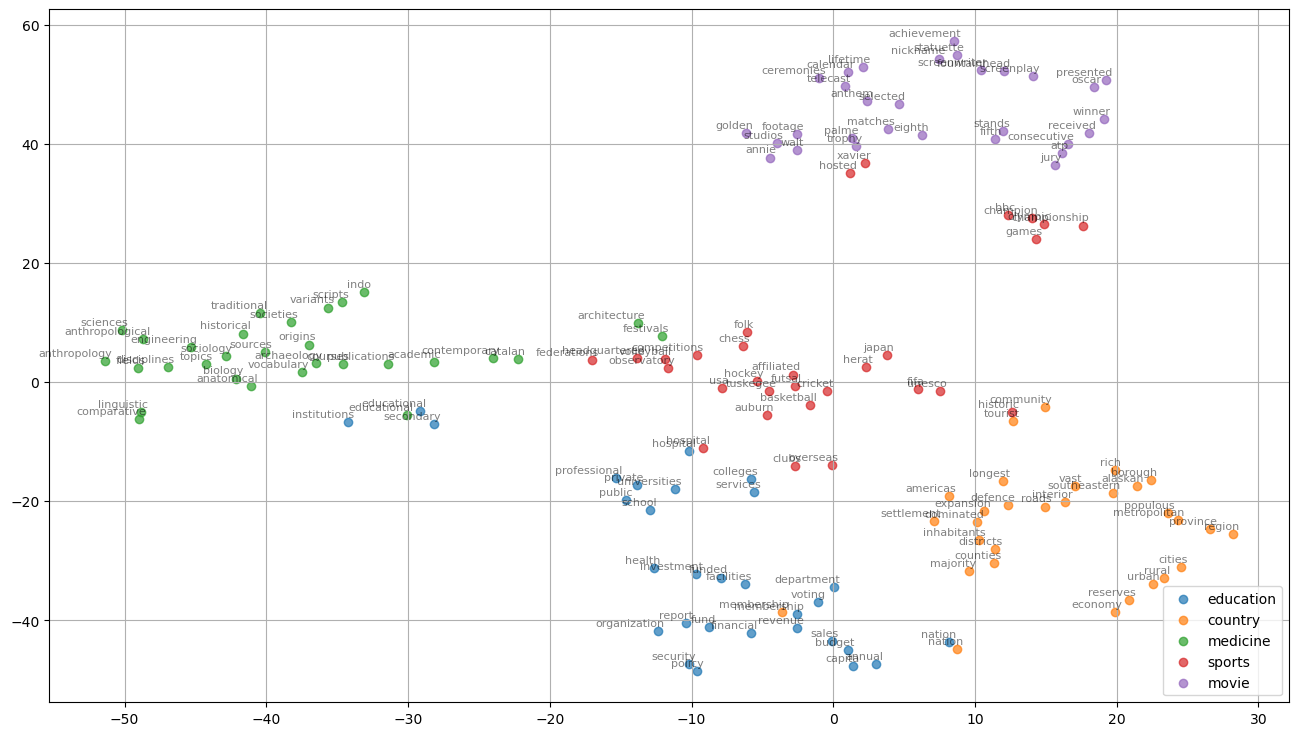

In [37]:
cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie']
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = cluster_key_words)
tsne_plot_similar_words(cluster_key_words, embeddings_en_2d, word_clusters)

## 4.2 CbOW
### 4.2.1 Set the variable *model* to the cbow word2vec model trained and saved in section 3 (*code*)

In [18]:
model = Word2Vec.load("word2vec_cbow.model")

### 4.2.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [19]:
words_vocab = list(model.wv.index_to_key )
print("Size of Vocabulary before Stop Words removal:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:10])

words_vocab_without_sw = [word for word in words_vocab if word not in stopwords.words('english')]
print("Size of Vocabulary after Stop Words removal:",len(words_vocab_without_sw))
print("Few words in Vocabulary",words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 9002
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']
Size of Vocabulary after Stop Words removal: 8881
Few words in Vocabulary ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


### 4.2.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the CBoW model (*run only*)

Embedding clusters: [-0.3877012  -0.05794051  0.13411823 -0.0249371  -0.11651176 -0.59897625
  0.67585355  0.7230755  -0.21918587  0.13653648 -0.08538883 -0.4731271
  0.06329229  0.3065682   0.0504725   0.21360786  0.61018443  0.21131738
 -0.40885553 -0.8976142   0.16440873 -0.01557137  0.13996588 -0.28120747
  0.18415783  0.22323458 -0.47167316  0.07797576 -0.13182443 -0.56166255
 -0.12345062  0.05179139  0.3850828  -0.35999745 -0.43932813  0.10573951
  0.6693051   0.02252755 -0.17550704 -0.24323821  0.4397942  -0.32534775
 -0.34609443  0.42605278  0.3130872  -0.15256722 -0.3258485  -0.68687207
  0.1925361   0.59281766]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['province', 'area', 'population', 'economy', 'southeastern', 'government', 'region', 'highest', 'rest', 'member', 'azerbaijan', 'third', 'republic', 'nation', 'beginning', 'middle', 'constitution', 'territory', 'andorra', 'alaska', 'leadership', 'district', 'decade', 'central', 'state', 'founding', 'adoption', 'devel

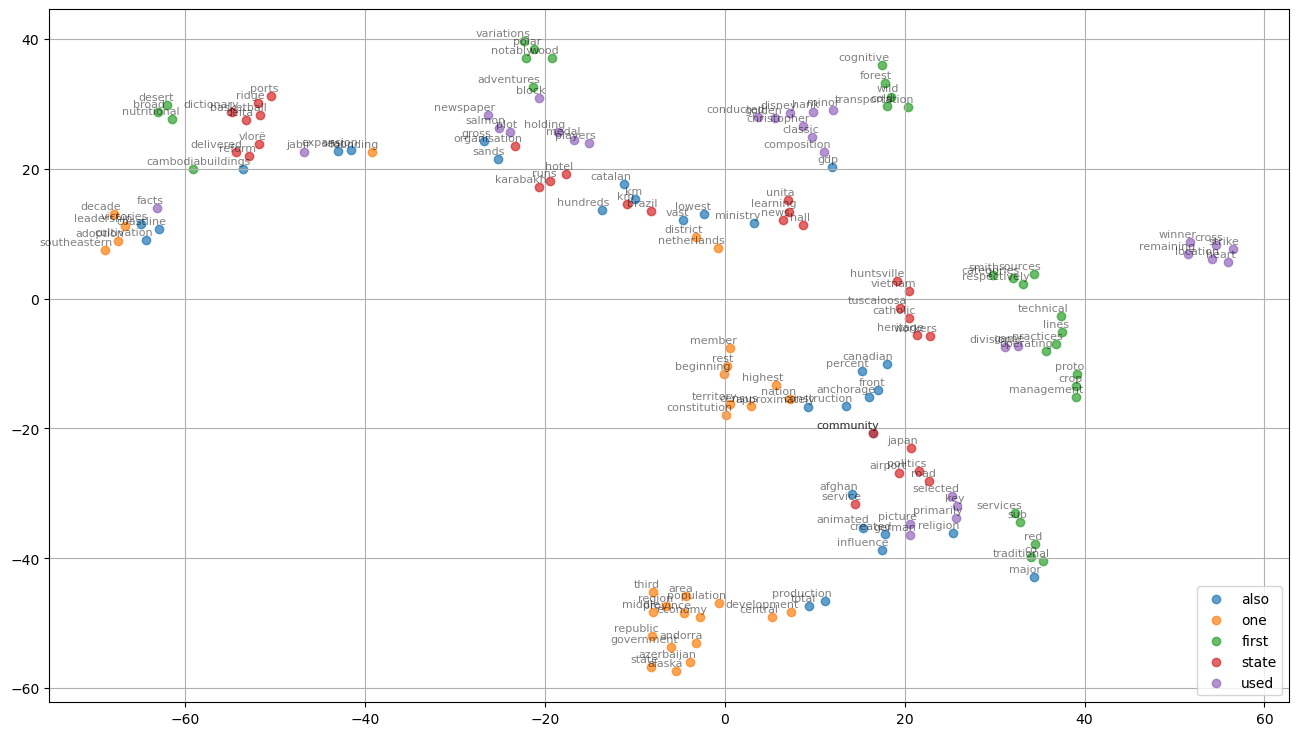

In [20]:
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

## 4.3 Compare the two figures in section 4.1.3 and 4.2.3 and comment (*comment*)

### SkipGram Model Analysis:
- The words around the keywords form relatively tight clusters. For instance, around "education," we find related terms such as "linguistic", "secondary", and "institution".
- There is a clear separation between the clusters, suggesting that the SkipGram model effectively captures the distinct semantic relationships between different words.
- Clusters tend to be centered around their respective keywords, indicating a strong performance of the SkipGram model in capturing lexical contextual relationships.

### CBOW Model Analysis:
- Compared to the SkipGram model, the boundaries between clusters in the CBOW model are somewhat blurred, which might indicate a slightly weaker capacity in differentiating between various semantic contexts.
- Vocabulary clusters appear more dispersed than those in the SkipGram model, suggesting that CBOW might not be as adept at capturing the nuanced semantics of individual words.
- The CBOW model's handling of high-frequency words, such as "also", "one", "first", appears to place them in specific areas of the visualization. This could be due to these words appearing across a wide variety of contexts, causing their vector representations to be less distinctly associated with specific semantic clusters than in the SkipGram model.

### Summary:
- The SkipGram model demonstrates superior performance in both visualizations, particularly in capturing the fine-grained semantics of words and differentiating between various semantic categories.
- On the other hand, the CBOW model's less effective treatment of high-frequency words may lead to some areas of the visualization featuring words that are less relevant to specific topics or categories. This is possibly because CBOW tends to generalize the context of frequently occurring words, while SkipGram focuses on understanding the specific context of each individual word.